In [1]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [2]:
image = mx.image.imread('scenery.jpeg')

In [3]:
print('type: ',type(image))

type:  <class 'mxnet.ndarray.ndarray.NDArray'>


In [4]:
print('shape: ', image.shape)

shape:  (780, 1040, 3)


In [5]:
print('min image value: ', image.min().asscalar())
print('max image value: ', image.max().asscalar())

min image value:  0
max image value:  255


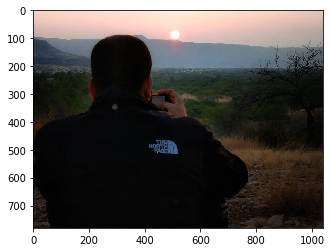

In [6]:
plt.imshow(image.asnumpy())

In [7]:
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [8]:
print('type: ',type(image))
print('shape: ', image.shape)
print('min image value: ', image.min().asscalar())
print('max image value: ', image.max().asscalar())

type:  <class 'mxnet.ndarray.ndarray.NDArray'>
shape:  (1, 3, 224, 224)
min image value:  -2.117904
max image value:  2.64


In [9]:
network = gcv.model_zoo.get_model('ResNet50_v1d', pretrained = True)

In [10]:
prediction = network(image)

In [11]:
print(prediction.shape)

(1, 1000)


In [12]:
prediction = prediction[0]

In [13]:
print(prediction.shape)

(1000,)


In [14]:
print(prediction[950:])


[ 7.7017307e-01 -1.9417703e-02 -8.0136746e-01 -5.0818972e-02
 -6.6280645e-01  4.3579748e-01  1.0966864e+00 -1.9204143e-01
  8.2636034e-01  1.6889423e-02  6.1948973e-01 -5.2617574e-01
  1.8529296e-03  1.5401563e-01 -4.7509861e-01  1.0553390e-01
  1.6025224e+00  6.6573691e-01  1.2598701e+00  6.3118279e-01
  2.4496493e+00  2.8870144e+00  5.9995899e+00  1.0063377e-01
  3.0796916e+00  5.3484650e+00  6.5701561e+00  4.5459437e+00
  5.6991110e+00  3.0037148e+00  4.2867494e+00  2.5216925e+00
  4.7866058e-01  8.6845845e-01  9.6781558e-01 -7.0439529e-01
 -2.9190883e-01  2.7320214e-02 -2.0050460e-01  4.2965016e-01
 -2.9711965e-01 -5.6570306e-02  1.6694808e-01  1.0926950e+00
 -1.6285536e-01  3.3775496e-01  4.6170759e-01  8.0030560e-01
  1.0186343e+00 -3.3074689e-01]
<NDArray 50 @cpu(0)>


In [15]:
probability = mx.nd.softmax(prediction)

In [16]:
rounded_probability = mx.nd.round(probability*100)/100
print(rounded_probability[955:])


[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.04 0.   0.   0.02 0.07 0.01 0.03 0.   0.01 0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.  ]
<NDArray 45 @cpu(0)>


In [17]:
network = gcv.model_zoo.get_model('ResNet50_v1d', pretrained = True)
# gcv.model_zoo.resnet50_v1b(pretrained=True)

In [19]:
mx.nd.softmax(mx.nd.array((-0.5,0.5)))


[0.26894143 0.7310586 ]
<NDArray 2 @cpu(0)>

In [20]:
mx.nd.softmax(mx.nd.array((-0.5,1)))


[0.18242551 0.81757444]
<NDArray 2 @cpu(0)>

In [21]:
mx.nd.softmax(mx.nd.array((-1.0,1.0)))


[0.11920292 0.880797  ]
<NDArray 2 @cpu(0)>

In [22]:
k = 5
topk_indicies = mx.nd.topk(probability, k = k)
topk_indicies


[764. 976. 447. 972. 465.]
<NDArray 5 @cpu(0)>

In [24]:
network.classes[567]

'frying pan'

In [27]:
for i in range(k):
    class_index = topk_indicies[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    print('#{} {} ({:0.3}%)'.format(i+1, class_label, class_probability.asscalar()*100))

#1 rifle (25.3%)
#2 promontory (6.98%)
#3 binoculars (4.91%)
#4 cliff (3.95%)
#5 bulletproof vest (3.2%)
